# Modules

In [48]:
# numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# for KNN
from sklearn import neighbors, datasets

# Model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 

# Cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Random
import random

# Import Data

In [2]:
# Import Data
credit = pd.read_csv('Data/creditOne.csv')

# Split Data

In [3]:
# set seed
random.seed(123)
np.random.seed(123)

In [4]:
# Select dependent variables
indepVars = credit.drop(['Default'], axis = 1)

In [5]:
# Dependent variable
depVar = credit.loc[: , 'Default']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(indepVars, depVar, test_size = 0.25)
print('training set looks like:', str(x_train.shape) + ', and the testing set like:', str(x_test.shape))

training set looks like: (22500, 5), and the testing set like: (7500, 5)


# Balance Data

In [63]:
# Note that the data set is very unbalanced.
# Initial recall and F1 scores were low (37.31 and 46.21 % resp.)

y_counts = y_train.value_counts()

print('In train set')
print('Observations:', len(y_train))
print('Pay:', y_counts[0])
print('Default:', y_counts[1])
print('Proportion:', round(y_counts[0] / y_counts[1], 2), ': 1')


In train set
Observations: 22500
Pay: 17491
Default: 5009
Proportion: 3.49 : 1


In [67]:
# Under/over-sample to avg group size
# 22500 / 2 = 11250

# concatenate training set
xy_train = pd.concat([x_train, y_train], axis = 1, sort = False)

# Divide by 'Default'
train_0 = xy_train[xy_train['Default'] == 0]
train_1 = xy_train[xy_train['Default'] == 1]


In [76]:
# define length of groups
# take avg as stated above
avg_size = int(len(xy_train)/2)

# Random over-sampling of train_0
under_0 = train_0.sample(avg_size)

# Random over-sampling of train_1
over_1 = train_1.sample(avg_size, replace = True)

# concatenate the results 
xy_train_balanced = pd.concat([under_0, over_1], axis = 0)

print('Random re-sampling:')
print(xy_train_balanced.Default.value_counts())

Random re-sampling:
1    11250
0    11250
Name: Default, dtype: int64


In [77]:
# split balanced training set into x_train_bal / y_train_bal
x_train_bal = xy_train_balanced.drop(['Default'], axis  = 1)
y_train_bal = xy_train_balanced.loc[:, 'Default']

# Train Model

In [78]:
# KNN Model

# Create an instance of Neighbours Classifier
knn_model = neighbors.KNeighborsClassifier(n_neighbors = 25, weights = 'distance')

# Fit that to the train data
# Note: the model expects an array as y variable (df['array'])
credit_knn = knn_model.fit(x_train_bal, y_train_bal)


In [79]:
# make predictions
predictions = credit_knn.predict(x_test)

# Check Results

In [80]:
# Check performance
# note : accuracy and kappa are symmetrical
# recall, precision and f1 are not
y_true = y_test
y_pred = predictions

accuracy = accuracy_score(y_true , y_pred)
kappa = cohen_kappa_score(y_true , y_pred)
recall = recall_score(y_true , y_pred)
precision = precision_score(y_true , y_pred)
f1 = f1_score(y_true , y_pred)
print ("Accuracy : %s" % "{0:.2%}".format(accuracy))
print ("Kappa : %s" % "{0:.2%}".format(kappa))
print ("")
print ("Recall : %s" % "{0:.2%}".format(recall))
print ("Precision : %s" % "{0:.2%}".format(precision))
print ("F1 : %s" % "{0:.2%}".format(f1))

Accuracy : 75.44%
Kappa : 32.90%

Recall : 54.09%
Precision : 44.56%
F1 : 48.86%


In [81]:
# Confusion Matrix

# Note : false positives are potentially costly
# number of fp in initial model : 1020

# [[5480  393]
#  [1020  607]]


# First, change 0/1 into 'Pay'/'Default'
# for df y_test:
default_int_to_object = {0: 'Pay', 1: 'Default'}
y_test_obj = y_test.replace(default_int_to_object)
# for array predictions
predictions_obj = ['Default' if x == 1 else 'Pay' for x in predictions]

# Labels
labels = ['Pay', 'Default']

cm = confusion_matrix(y_true = y_test_obj,
                      y_pred = predictions_obj,
                      labels = labels)
print(cm)


[[4778 1095]
 [ 747  880]]


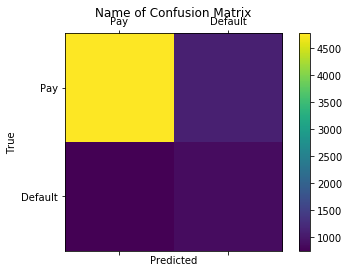

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Name of Confusion Matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()